In [207]:
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [29]:
# read the hotel reservation file

hotel = pd.read_csv('Hotel Reservations.csv')
pd.options.display.max_colwidth = 100

In [30]:
hotel = hotel.drop('Booking_ID', axis = 1)

In [ ]:

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

hotel['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(hotel['type_of_meal_plan'])
hotel['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(hotel['room_type_reserved'])
hotel['market_segment_type'] = label_encoder_market_segment_type.fit_transform(hotel['market_segment_type'])
hotel['booking_status'] = label_encoder_booking_status.fit_transform(hotel['booking_status'])


In [ ]:
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(le_name_mapping)

In [198]:
X = hotel.drop('booking_status', axis = 1)
X = X.values
X_standard = StandardScaler().fit_transform(X)
y = hotel['booking_status']

In [208]:
x_train, x_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)

In [180]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Naive Bayes

In [181]:

classifier = make_pipeline(SMOTE(random_state=100), GaussianNB(var_smoothing=1e-03))
classifier.fit(X, y)

scores = cross_validate(classifier, X, y, scoring=scoring, cv=kf)
print(scores)
print("Mean score for accuracy: ", scores['test_accuracy'].mean())
print("Mean score for precision: ", scores['test_precision'].mean())
print("Mean score for recall: ", scores['test_recall'].mean())
print("Mean score for f1: ", scores['test_f1'].mean())
print("Mean score for roc_auc: ", scores['test_roc_auc'].mean())


{'fit_time': array([0.25847983, 0.29394579, 0.28520322, 0.27014875, 0.28089929]), 'score_time': array([0.0306375 , 0.03568363, 0.04119968, 0.02922869, 0.03872514]), 'test_accuracy': array([0.73494142, 0.72984149, 0.72929014, 0.72170917, 0.73618194]), 'test_precision': array([0.80591691, 0.80535381, 0.80104822, 0.8059126 , 0.81132853]), 'test_recall': array([0.79375904, 0.79155619, 0.7901158 , 0.77169231, 0.79785295]), 'test_f1': array([0.79979178, 0.79839539, 0.79554445, 0.78843131, 0.80453431]), 'test_roc_auc': array([0.78576227, 0.77168619, 0.77467742, 0.77310291, 0.78035137])}
Mean score for accuracy:  0.7303928325292902
Mean score for precision:  0.8059120122043858
Mean score for recall:  0.788995256843682
Mean score for f1:  0.797339448606072
Mean score for roc_auc:  0.7771160301919415


0.7303928325292901

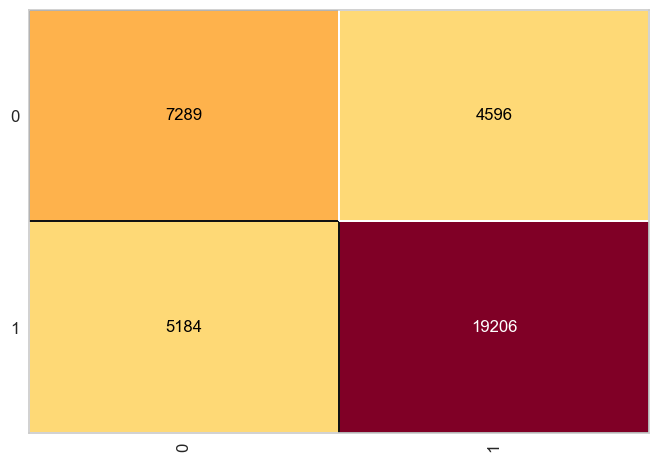

In [184]:
# Confusion Matrix
cm = ConfusionMatrix(classifier)
cm.fit(X, y)
cm.score(X, y)

# KNN

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores = []

#Determine the best number of neighbours
knn = KNeighborsClassifier()
classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), knn)

no_neighbours_list = list(range(1,10))
# k_values = dict(n_neighbors = no_neighbours_list)
params = {'kneighborsclassifier__n_neighbors': no_neighbours_list}
# perform a new split inside method
grid = GridSearchCV(classifier, param_grid=params, cv = kf, scoring =  scoring, n_jobs = -1, refit = False)

In [186]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=100)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9]},
             refit=False,
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [187]:
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), knn)
    score = cross_validate(classifier, X, y, scoring=scoring, cv=kf)
    # take scores
    test_accuracy = score['test_accuracy'].mean() 
    test_precision = score['test_precision'].mean()
    test_recall = score['test_recall'].mean()
    test_f1 = score['test_f1'].mean()
    test_roc_auc = score['test_roc_auc'].mean()
    
    accuracies.append(test_accuracy)
    precisions.append(test_precision)
    recalls.append(test_recall)
    f1s.append(test_f1)
    roc_aucs.append(test_roc_auc)

    print("Iteration: ", i)


Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9


In [188]:
# create a dataframe of the scores
# scores_df = pd.DataFrame(scores, columns=['neighbors', 'score'])
# scores_df

scores = pd.DataFrame({'neighbors': no_neighbours_list, 'accuracy': accuracies, 'precision': precisions, 'recall': recalls, 'f1': f1s, 'roc_auc': roc_aucs})
scores

,neighbors,accuracy,precision,recall,f1,roc_auc
0,1,0.847636,0.892689,0.879110,0.885832,0.831078
1,2,0.814087,0.922032,0.790329,0.851110,0.865962
2,3,0.834045,0.903133,0.843678,0.872387,0.884430
3,4,0.812957,0.925145,0.785368,0.849540,0.894286
4,5,0.832088,0.910127,0.832483,0.869572,0.899692
5,6,0.815245,0.924263,0.789960,0.851846,0.902820
6,7,0.830710,0.912081,0.828060,0.868035,0.905428
7,8,0.813728,0.921827,0.789958,0.850805,0.907307
8,9,0.826823,0.912448,0.821240,0.864439,0.908459


0.8537560303239146

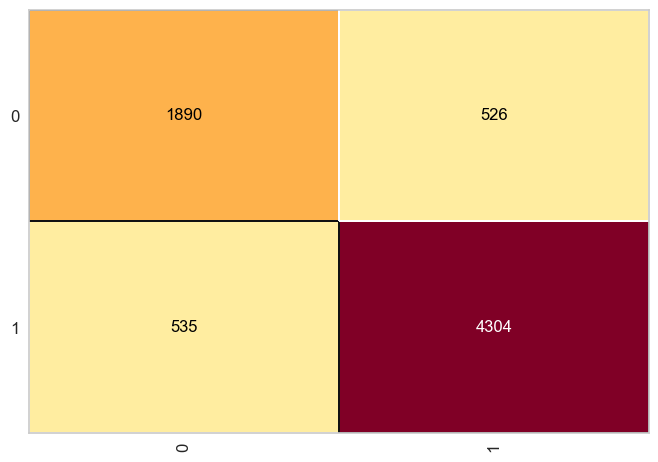

In [210]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

cm = ConfusionMatrix(knn_classifier)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

# Neural networks

In [ ]:
from keras.utils import np_utils
y_convert = np_utils.to_categorical(y)
X_standard = StandardScaler().fit_transform(X)

# train using Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.metrics import AUC, Precision, Recall, CategoricalAccuracy

metrics = [Precision(), Recall(), CategoricalAccuracy(), AUC()]

def test_model(optimizer, learning_rate):
    accuracies = []
    precisions = []
    recalls = []
    roc_aucs = []

    # implement k-fold cross validation
    fold_no = 1
    for train, test in kf.split(X_standard, y_convert):
        train_data_x, train_data_y = SMOTE(random_state=100).fit_resample(X_standard[train], y_convert[train])
        train_data_y = np_utils.to_categorical(train_data_y)

        model = Sequential()
        model.add(Dense(32, input_dim = 17, kernel_initializer = 'uniform', activation = 'relu'))
        model.add(Dropout(0.2)) 
        model.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu'))
        model.add(Dropout(0.2)) 
        model.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu'))
        model.add(Dropout(0.2)) 
        model.add(Dense(256, kernel_initializer = 'uniform', activation = 'relu'))
        model.add(Dropout(0.2)) 
        model.add(Dense(2, kernel_initializer = 'uniform', activation = 'softmax'))
        
        to_add_optimizer = optimizer(learning_rate=learning_rate)

        model.compile(loss='categorical_crossentropy', optimizer = to_add_optimizer, metrics=metrics)
        history = model.fit(train_data_x, train_data_y, epochs = 30, batch_size = 600, verbose = 0, use_multiprocessing=True) 
        scores = model.evaluate(X_standard[test], y_convert[test], verbose=0)

        print('Fold: ', fold_no)
        accuracies.append(scores[3])
        precisions.append(scores[1])
        recalls.append(scores[2])
        roc_aucs.append(scores[4])
        fold_no = fold_no + 1
    
    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(roc_aucs)
    


In [ ]:
# try different learning_rate 
learning_rate = [0.001, 0.01, 0.02, 0.03, 0.1]
optimizers = [Adam, SGD, RMSprop]

final_results = []

for optimizer in optimizers:
    for lr in learning_rate:
        print("Optimizer: ", optimizer.__name__)
        print("Learning rate: ", lr)
        final_results.append((optimizer.__name__, lr, test_model(optimizer, lr)))

In [ ]:
# vizualize the results
def display_statistics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.savefig('../statistics/overflow-acc.png')
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig('../statistics/overflow-val.png')
    plt.show()

# Decision Trees

In [ ]:
# implement decision trees
from sklearn.tree import DecisionTreeClassifier 

min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'decisiontreeclassifier__min_samples_split': min_split, 'decisiontreeclassifier__max_depth': max_nvl, 'decisiontreeclassifier__criterion': alg}

tree = DecisionTreeClassifier()
classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), tree)

grid = GridSearchCV(classifier, param_grid=values_grid, cv = kf, scoring =  scoring, n_jobs = -1, refit = False)

In [ ]:
grid.fit(X, y)

In [173]:
columns = ["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1", "mean_test_roc_auc"]
params = pd.DataFrame(grid.cv_results_['params'])
scores = pd.DataFrame(grid.cv_results_)[columns]
scores = pd.concat([params, scores], axis=1)

#rename columns
scores.columns = ['criterion', 'max_depth', 'min_samples_split', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores.sort_values(by=['accuracy'], ascending=False)


,criterion,max_depth,min_samples_split,accuracy,precision,recall,f1,roc_auc
36,entropy,11,2,0.862853,0.908806,0.885243,0.896604,0.929395
39,entropy,11,5,0.862826,0.908737,0.885284,0.896588,0.929613
38,entropy,11,4,0.862826,0.908664,0.885364,0.896598,0.929581
40,entropy,11,6,0.862660,0.908606,0.885163,0.896471,0.929878
37,entropy,11,3,0.862467,0.908365,0.885125,0.896334,0.928899
...,...,...,...,...,...,...,...,...
5,entropy,3,7,0.786492,0.862204,0.812250,0.836467,0.820231
4,entropy,3,6,0.786492,0.862204,0.812250,0.836467,0.820231
3,entropy,3,5,0.786492,0.862204,0.812250,0.836467,0.820231
2,entropy,3,4,0.786492,0.862204,0.812250,0.836467,0.820231


0.8736044107512061

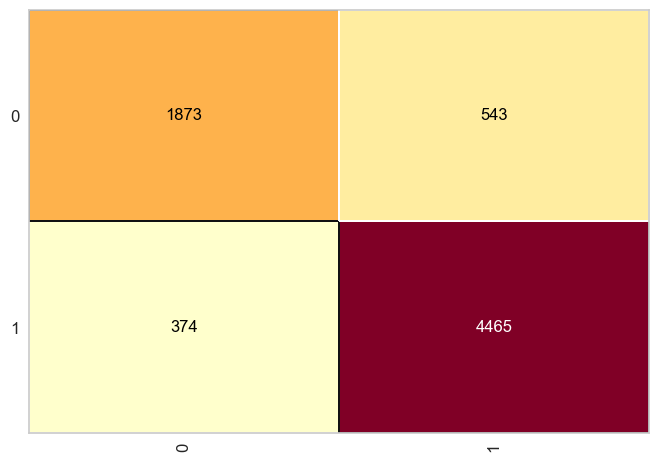

In [211]:
tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=2)
tree_classifier.fit(x_train, y_train)
y_pred = tree_classifier.predict(x_test)

cm = ConfusionMatrix(tree_classifier)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

# Random forest

In [136]:
# implement random forest
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'randomforestclassifier_n_estimators': n_estimators, 'randomforestclassifier_min_samples_split': min_split, 'randomforestclassifier_max_depth': max_nvl, 'randomforestclassifier_criterion': alg}
classifier = make_pipeline(StandardScaler(), SMOTE(random_state=100), RandomForestClassifier()) 

gridRandomForest = GridSearchCV(classifier , param_grid = values_grid, cv = kf, scoring = scoring, n_jobs = -1, refit = 'accuracy'  )
gridRandomForest.fit(X_val, y_val)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([100])})

In [137]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.8566617862371888
Mín Split:  4
Max Nvl:  11


# xgBoost

In [150]:
from xgboost import XGBClassifier

n_estimators = np.array([100])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])

model = XGBClassifier()
values_grid = {'n_estimators': n_estimators, 'max_depth': max_nvl}
gridXGBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 2)
gridXGBoost.fit(X_val, y_val)


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'n_estimators': array([100])})

In [154]:
print("Estimators: ", gridXGBoost.best_estimator_.n_estimators)
print("Max Nvl: ", gridXGBoost.best_estimator_.max_depth)
print('Score: ',gridXGBoost.best_score_)

Estimators:  100
Max Nvl:  7
Score:  0.8535871156661786


# SVM

In [163]:
y_train_flatten = np.argmax(y_train, axis=1)

(31219,)

In [164]:
# implement SVM
from sklearn.svm import SVC
# use SVC with linear kernel
classifier = SVC(kernel = 'linear', random_state = 0)

#transform y_train from one-hot to categorical

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)


0.7726527265272652


# ExtraTrees

In [138]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridExtraTrees.fit(X_val, y_val)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [141]:

print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  entropy
Score:  0.8701317715959004


In [142]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

In [143]:
accuracy_score(y_test, previsoes)

0.9214842148421484

# Observations

We noticed that using StandardScaler on the data decreased the accuracy on Naive Bayes classifier.